# Explore data
To see how we can use oour data, we do some investigation.

In [6]:
# Load libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load pickle file
df = pd.read_pickle("../data/intermediate.pkl")

In [11]:
# Use a subset without neighborhoods for correlation check
subset = df[[col for col in df.columns if not col.startswith("ne")]]

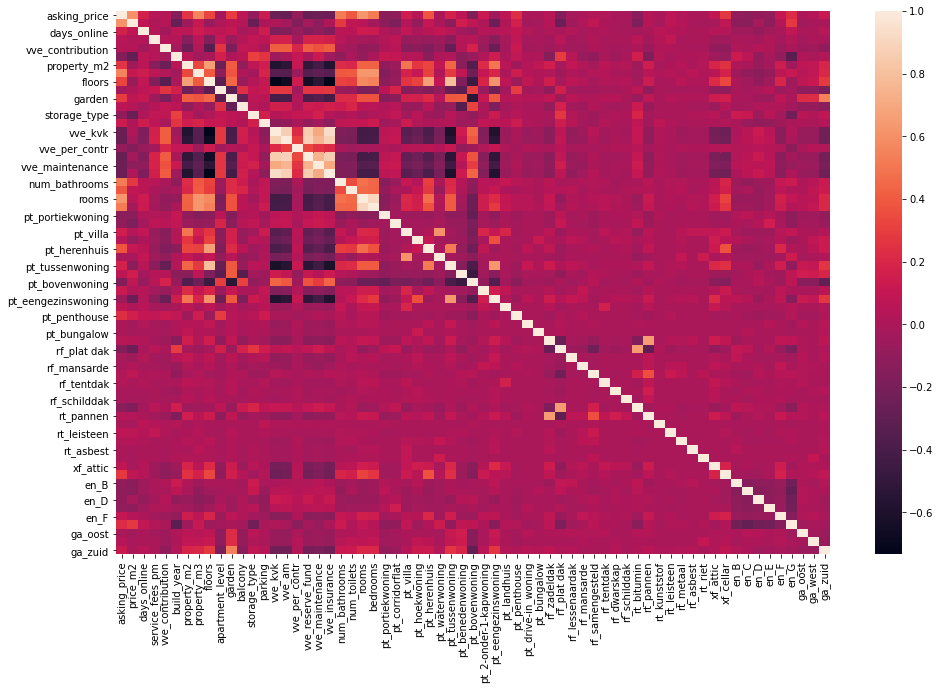

In [12]:
# Produce a heatmap 
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(subset.corr())

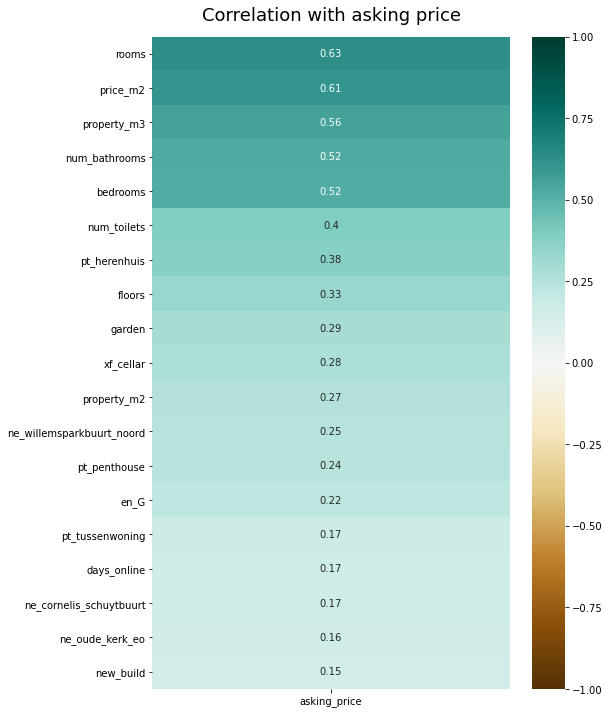

In [28]:
# Correlation viewed related to asking price
corr_series = df.corr()[["asking_price"]].sort_values(by="asking_price", ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_series[1:20], 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title("Correlation with asking price", 
                  fontdict={'fontsize':18}, 
                  pad=16);

In [26]:
corr_df = pd.DataFrame(corr_series)
corr_df["truncated"] = np.where(corr_series < 0, corr_series, pd.NA)

In [27]:
corr_df.dropna()

,asking_price,truncated


In [29]:
df.to_csv("../data/intermediate.csv")